# Calculus
This section covers how to do basic calculus tasks such as derivatives, integrals, limits, and series expansions in SymPy. If you are not familiar with the math of any part of this section, you may safely skip it.

ref: https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html

In [1]:
from sympy import *

x, y, z = symbols('x y z')
init_printing(use_unicode=True)

# Derivatives
To take derivatives, use the diff() function.

In [2]:
diff(cos(x), x)

In [3]:
diff(exp(x**2), x)

``diff()`` can take multiple derivatives at once. To

take multiple derivatives, pass the variable as many times as you wish to following find the third derivative of $x^4$.

In [4]:
diff(x**4, x, x, x)

In [5]:
diff(x**4, x, 3)

You can also take derivatives with respect to many variables at once. Just pass each derivative in order, using the same syntax as for single variable derivatives. For example, each of the following will compute
$$ 
\frac{\partial^7}{\partial x\partial y^2\partial z^4} e^{xyz}
$$
.

In [8]:
expr = exp(x*y*z)

In [9]:
diff(expr, x, y, y, z, z, z, z)

In [10]:
diff(expr, x, y, 2, z, 4)

In [11]:
diff(expr, x, y, y, z, 4)

``diff()`` can also be called as a method. The two ways of calling ``diff()`` are exactly the same, and are provided only for convenience.

In [12]:
expr.diff(x, y, y, z, 4)

To create an unevaluated derivative, use the Derivative class. It has the same syntax as ``diff()``.

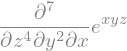

In [13]:
deriv = Derivative(expr, x, y, y, z, 4)
deriv

In [14]:
deriv.doit()

These unevaluated objects are useful for delaying the evaluation of the derivative, or for printing purposes. They are also used when SymPy does not know how to compute the derivative of an expression.

Derivatives of unspecified order can be created using tuple $(x, n)$ where $n$ is the order of the derivative with respect to $x$.

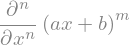

In [15]:
m, n, a, b = symbols('m n a b')
expr = (a*x + b)**m
expr.diff((x, n))

In [16]:
expr

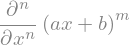

In [18]:
deriv = Derivative(expr, (x,n))
deriv

In [ ]:
deriv.doit()## what will this do?

# Integrals
To compute an integral, use the integrate() function. There are two kinds of integrals, definite and indefinite. To compute an indefinite integral, that is, an antiderivative, or primitive, just pass the variable after the expression.

In [21]:
integrate(cos(x), x)

Note that $\texttt{Sympy}$ does not include the constant of integration. If you want it, you can add one yourself, or rephrase your problem as a differential equation and use ``dsolve()`` to solve it, which does add the constant (see Solving Differential Equations).

To compute a definite integral, pass the argument ``(integration_variable, lower_limit, upper_limit)``. For example, to compute

$$
\int_{0}^{\infty} e^{-x} dx
$$

In [23]:
integrate(exp(-x), (x, 0, oo))

As with indefinite integrals, you can pass multiple limit tuples to perform a multiple integral. For example, to compute
$$
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}  e^{-x^2-y^2} dx dy
$$
do 

In [24]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

If ``integrate()`` is unable to compute an integral, it returns an unevaluated Integral object.

Integral(x**x, x)


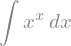

In [25]:
expr = integrate(x**x, x)
print(expr)
expr

As with ``Derivative``, you can create an unevaluated integral using Integral. To later evaluate this integral, call ``doit()``.

In [26]:
expr = Integral(log(x)**2, x)
expr
expr.doit()

``integrate()`` uses powerful algorithms that are always improving to compute both definite and indefinite integrals, including heuristic pattern matching type algorithms, a partial implementation of the Risch algorithm, and an algorithm using Meijer G-functions that is useful for computing integrals in terms of special functions, especially definite integrals. Here is a sampling of some of the power of ``integrate()``.

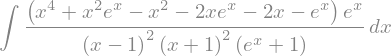

In [28]:
integ = Integral((x**4 + x**2*exp(x) - x**2 - 2*x*exp(x) - 2*x -
    exp(x))*exp(x)/((x - 1)**2*(x + 1)**2*(exp(x) + 1)), x)
integ

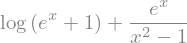

In [29]:
integ.doit()

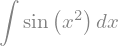

In [30]:
integ = Integral(sin(x**2), x)
integ

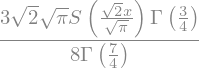

In [31]:
integ.doit()

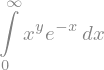

In [32]:
integ = Integral(x**y*exp(-x), (x, 0, oo))
integ

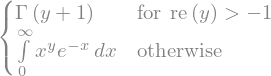

In [34]:
integ.doit()

This last example returned a Piecewise expression because the integral does not converge unless $\mathcal{R}(y) > -1$

# Numeric Integration
Numeric integration is a method employed in mathematical analysis to estimate the definite integral of a function across a simplified range. SymPy not only facilitates symbolic integration but also provides support for numeric integration. It leverages the precision capabilities of the mpmath library to enhance the accuracy of numeric integration calculations.

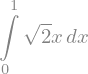

In [36]:
from sympy import Integral, Symbol, sqrt
x = Symbol('x')
integral = Integral(sqrt(2)*x, (x, 0, 1))
integral

In [38]:
integral.evalf()

To compute the integral with a specified precision:

In [39]:
integral.evalf(50)

Numeric integration becomes a viable approach in situations where symbolic integration is impractical or impossible. This method allows for the computation of integrals through numerical techniques, even when dealing with infinite intervals or integrands:

In [40]:
Integral(exp(-(x ** 2)), (x, -oo, oo)).evalf()

In [41]:
Integral(1 / sqrt(x), (x, 0, 1)).evalf()

# Limits

SymPy can compute symbolic limits with the limit() function. The syntax to compute
$$
\lim_{x \to x_0 } f(x)
$$
is ``limit(f(x), x, x0)``.

In [42]:
limit(sin(x)/x, x, 0)

``limit()`` should be used instead of ``subs()`` whenever the point of evaluation is a singularity. Even though $\texttt{SymPy}$ has objects to represent, using them for evaluation is not reliable because they do not keep track of things like rate of growth. Also, things like and return (not-a-number). For example

In [43]:
expr = x**2/exp(x)
expr.subs(x, oo)
limit(expr, x, oo)

Like Derivative and Integral, ``limit()`` has an unevaluated counterpart, ``Limit``. To evaluate it, use ``doit()``.

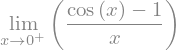

In [45]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr

In [46]:
expr.doit()

To evaluate a limit at one side only, pass '+' or '-' as a fourth argument to ``limit()``. For example, to compute

$$
\lim_{x \to 0^+ } \frac{1}{x}
$$
do 

In [47]:
limit(1/x, x, 0, '+')

In [48]:
limit(1/x, x, 0, '-')

$\texttt{SymPy}$ can compute asymptotic series expansions of functions around a point. To compute the expansion of $f(x)$ around the point $x=x_0$ terms of order $x^n$, use ``f(x).series(x, x0, n)``. $x_0$ and n can be omitted, in which case the defaults ``x0=0`` and ``n=6`` will be used

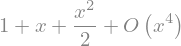

In [49]:
expr = exp(sin(x))
expr.series(x, 0, 4)

The term $O(x^4)$ at the end represents the Landau order term at $x=0$ (not to be confused with big $O$ notation used in computer science, which generally represents the Landau order term at $x$ where $x \to \infty$ ). It means that all $x$ terms with power greater than or equal to $x^4$ are omitted. Order terms can be created and manipulated outside of ``series``. They automatically absorb higher order terms.

In [51]:
x + x**3 + x**6 + O(x**4)


In [52]:
x*O(1)

If you do not want the order term, use the ``removeO()`` method.

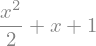

In [53]:
expr.series(x, 0, 4).removeO()

The ``O`` notation supports arbitrary limit points (other than 0):

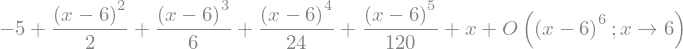

In [54]:
exp(x - 6).series(x, x0=6)

! Fin